# Flight Price Prediction: 

Flight Price Prediction Data Description:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

#### from above we can see all the information about the dataset lets now import all the essential libraries in Python for Importing the Dataset, EDA, Data Preprocessing, Removing Outliers, Removing Skewness, Dividing the dataset, training and testing the dataset and then to create the model and saving the best model.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import joblib
import warnings
from scipy.stats import zscore, boxcox, yeojohnson
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, power_transform, MinMaxScaler, OneHotEncoder, OrdinalEncoder, StandardScaler
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error
warnings.filterwarnings('ignore')

as we have imported all the essential libraries let us now import the data using pandas.read_csv() and save it in ds variable

In [2]:
ds = pd.read_excel("~/Desktop/Datatrained/Flight Price Prediction/Data_Train.xlsx")

as we have stored out data in ds variable lets us now look at the data using ds.head() it will show us the first 5 rows of the dataset

In [3]:
ds.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


so from above we can see all the columns and top 5 rows of the dataset

lets now look at the shape of the data using ds.shape

In [4]:
r, c = ds.shape
print("Number of rows are {} and columns are {}".format(r, c))

Number of rows are 10683 and columns are 11


from above we can see that there are total 10683 rows and 11 columns

lets now see the name of all the columns using ds.columns

In [5]:
ds.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

from above we can see all the column names 

lets now see if there are any missing values in the dataset or not using ds.isnull().sum()

In [6]:
ds.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

from above we can see that there are only two missing values in the datset in Route and Total_Stops column

lets now visualize this using heatmap

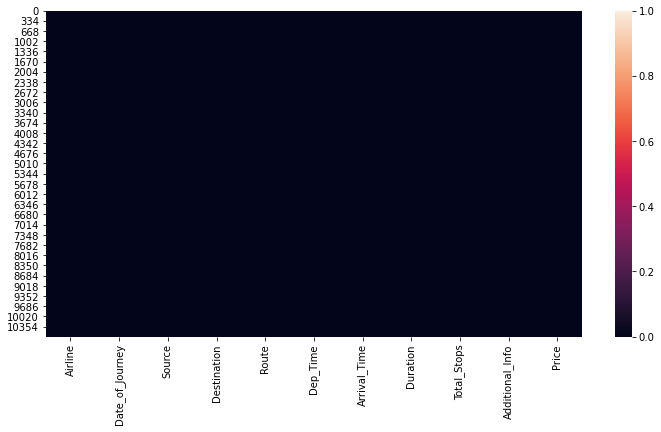

In [7]:
plt.figure(figsize = (12,6))
sns.heatmap(ds.isnull())

lets us drop those two column at it will not affect the dataset

In [8]:
ds.dropna(inplace=True)

In [9]:
ds.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

from above we can see that there are now no missing values in the dataset

lets us now look for more information about the dataset using ds.info()

In [10]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


from above we can see that there are 10682 rows and 11 columns in the dataset from which 10 of them are objects and 1 of them is Int64

lets now see the value_counts() of all the columns

In [11]:
for c in ds.columns:
    print(ds[c].value_counts())

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156


from above we can see the value_Counts of all the columns and now we can see that there is No info row which has two different format No Info and No info

### Data Cleaning 

lets us replace NO Info as No info

In [12]:
ds["Additional_Info"] = ds["Additional_Info"].replace({'No Info': 'No info'})

as we have to predict the flight price this is a regression type problem

In [13]:
ds['Duration'] =  ds['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [14]:
ds.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302


In [15]:
ds["Journey_day"] = ds['Date_of_Journey'].str.split('/').str[0].astype(int)

In [16]:
ds["Journey_month"] = ds['Date_of_Journey'].str.split('/').str[1].astype(int)

In [17]:
ds.drop('Date_of_Journey',1,inplace = True)

In [18]:
ds["Dep_hour"] = pd.to_datetime(ds["Dep_Time"]).dt.hour
ds["Dep_min"] = pd.to_datetime(ds["Dep_Time"]).dt.minute
ds.drop(["Dep_Time"], axis = 1, inplace = True)

In [19]:
ds["Arrival_hour"] = pd.to_datetime(ds.Arrival_Time).dt.hour
ds["Arrival_min"] = pd.to_datetime(ds.Arrival_Time).dt.minute
ds.drop(["Arrival_Time"], axis = 1, inplace = True)

In [20]:
ds.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,16,50,21,35


from above we can see that we have created new column with help of existing columns

## Lets start with EDA process

In [21]:
ds.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,16,50,21,35


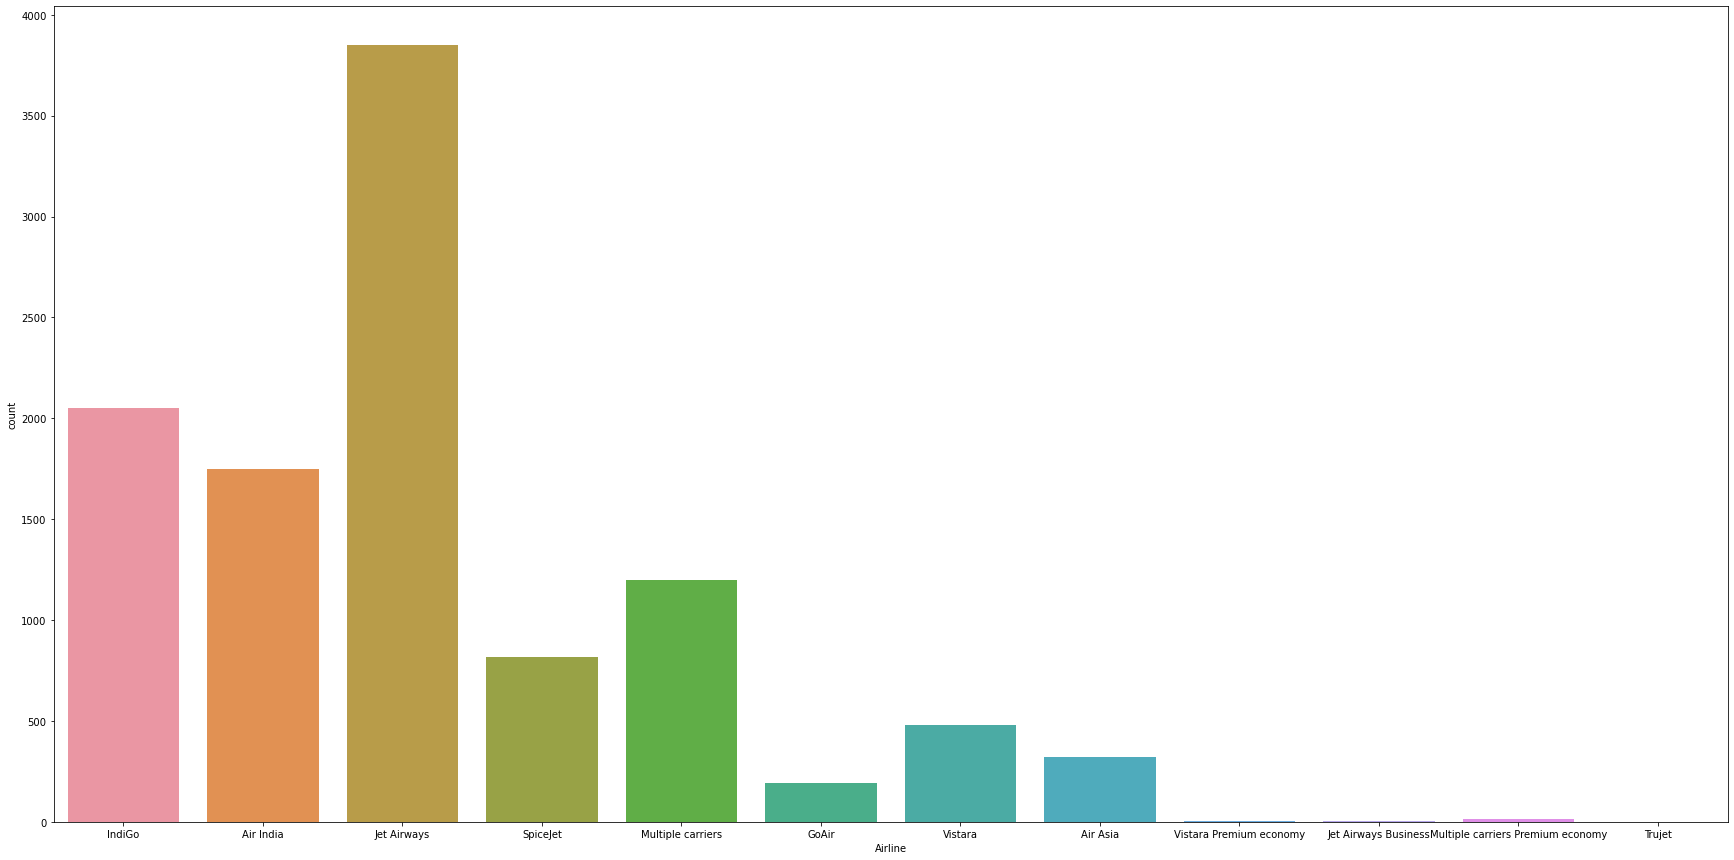

In [22]:
plt.figure(figsize = (30,15))
sns.countplot(ds['Airline'])

from above we can see the count of all the airlines from which jet airways has the heighest count

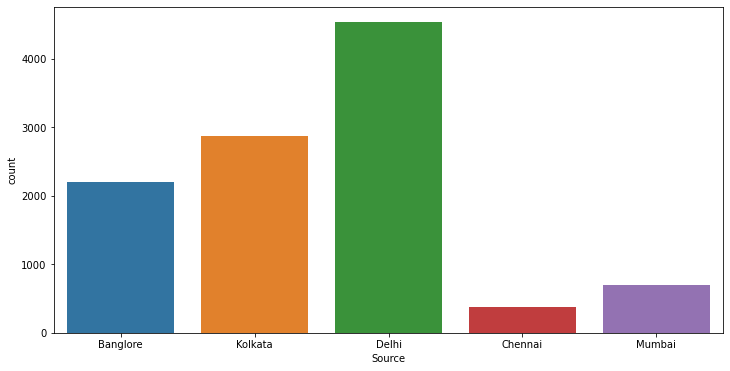

In [23]:
plt.figure(figsize = (12,6))
sns.countplot(ds['Source'])

from above we can see that more flights are taking off from Delhi

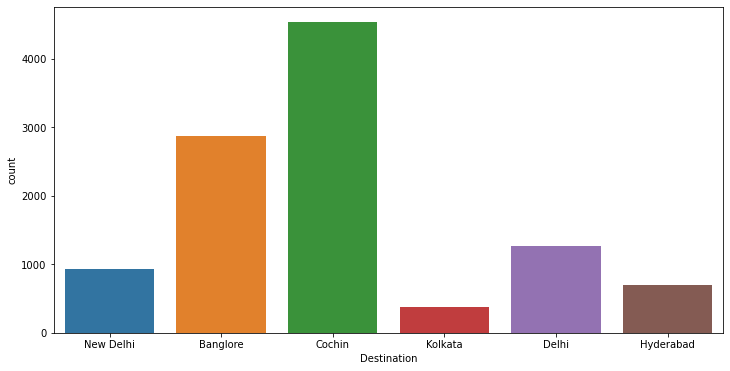

In [24]:
plt.figure(figsize = (12,6))
sns.countplot(ds['Destination'])

from above we can see that the Arrival Destination which has highest count is Cochin

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
BOM → COK → MAA → HYD       1
BOM → GOI → HYD             1
BOM → CCU → HYD             1
CCU → IXB → DEL → BLR       1
BOM → RPR → VTZ → HYD       1
Name: Route, Length: 128, dtype: int64


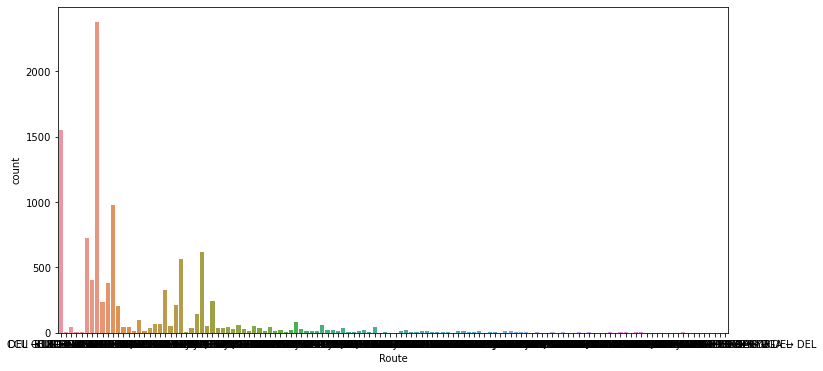

In [25]:
print(ds['Route'].value_counts())
plt.figure(figsize = (12,6))
sns.countplot(ds['Route'])

from above we can see that DEL → BOM → COK has the highest count in the route

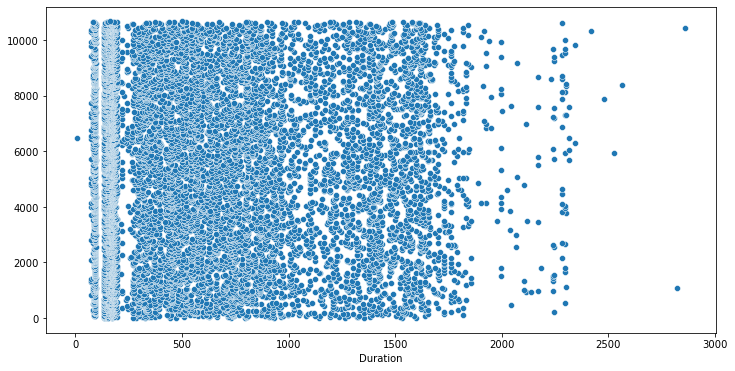

In [26]:
plt.figure(figsize = (12,6))
sns.scatterplot(ds['Duration'], ds.index)

from above we can see the Duration of the flight in which there are two extreme values near 3000

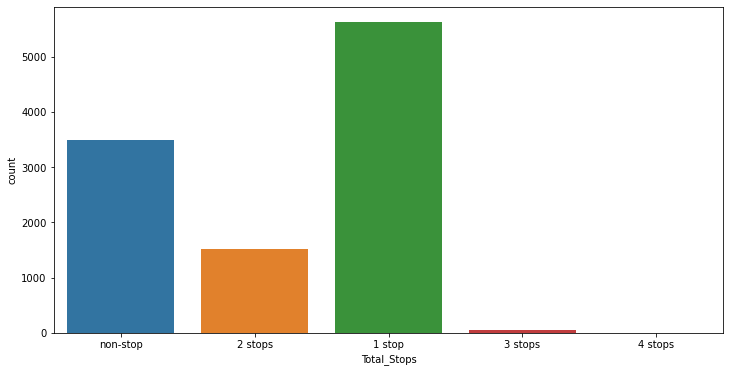

In [27]:
plt.figure(figsize = (12,6))
sns.countplot(ds['Total_Stops'])

Maximum flight has only 1 stop

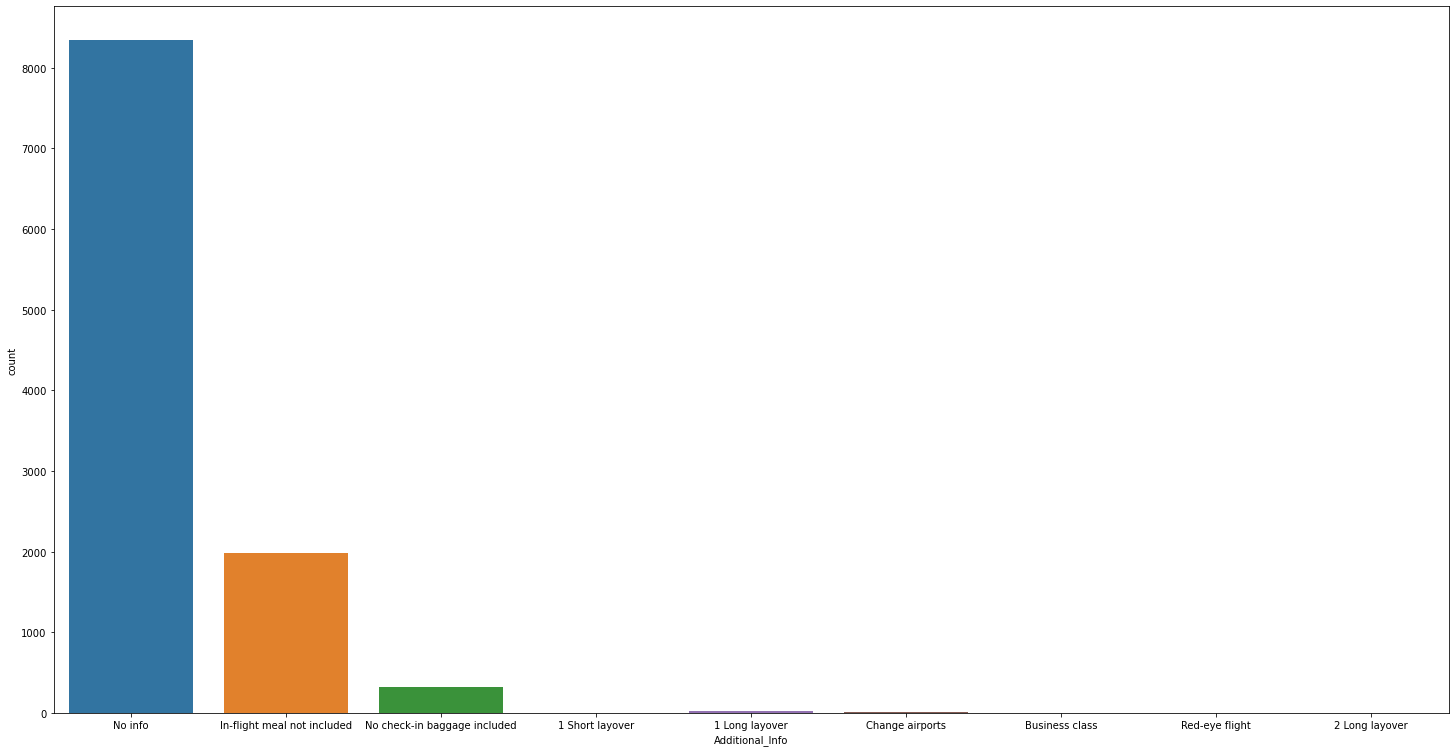

In [28]:
plt.figure(figsize = (25,13))
sns.countplot(ds['Additional_Info'])

from above we can see the in flight info with the count most of them has No Info

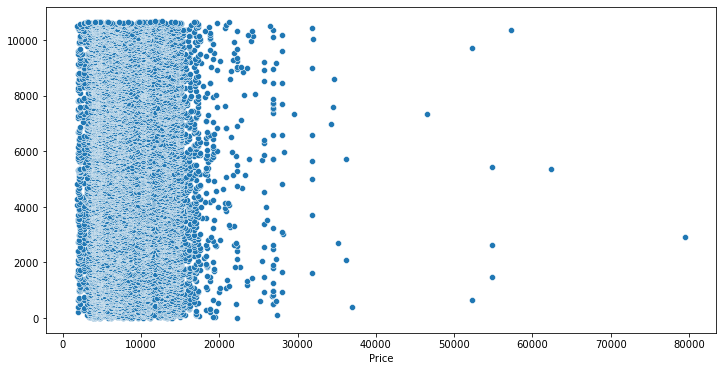

In [29]:
plt.figure(figsize = (12,6))
sns.scatterplot(ds['Price'], ds.index)

from above we can see the price the flight

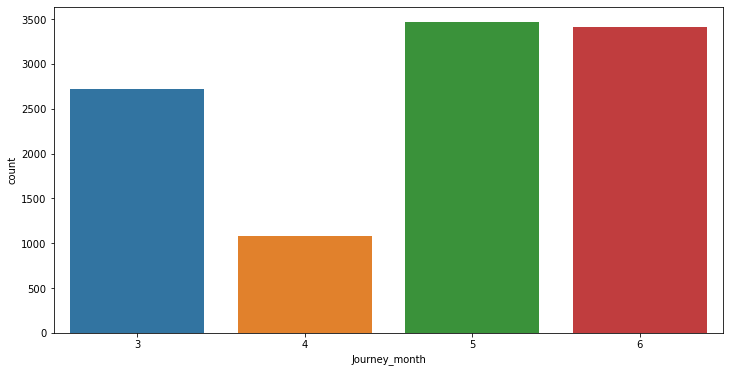

In [30]:
plt.figure(figsize = (12,6))
sns.countplot(ds['Journey_month'])

from above we can see the Month of May has the highest flights are from May and June when the Summer Vacation Start

In [31]:
ds.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,16,50,21,35


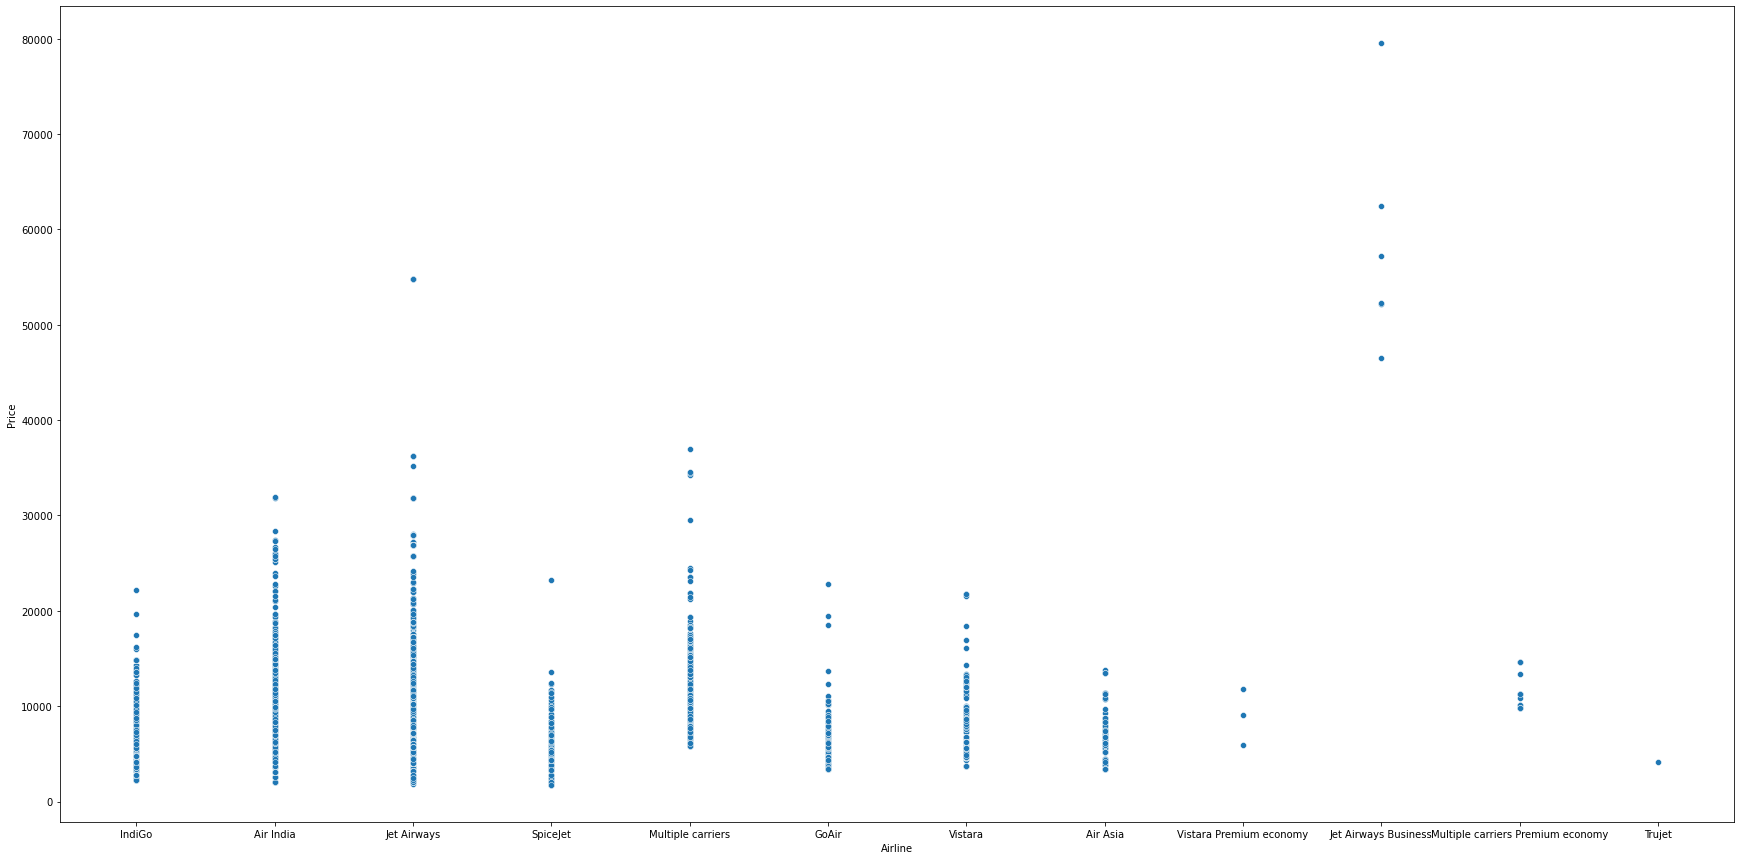

In [32]:
plt.figure(figsize = (30, 15))
sns.scatterplot(ds['Airline'], ds['Price'])

from above we can see that Jet Airways Bussiness has the highest Price 

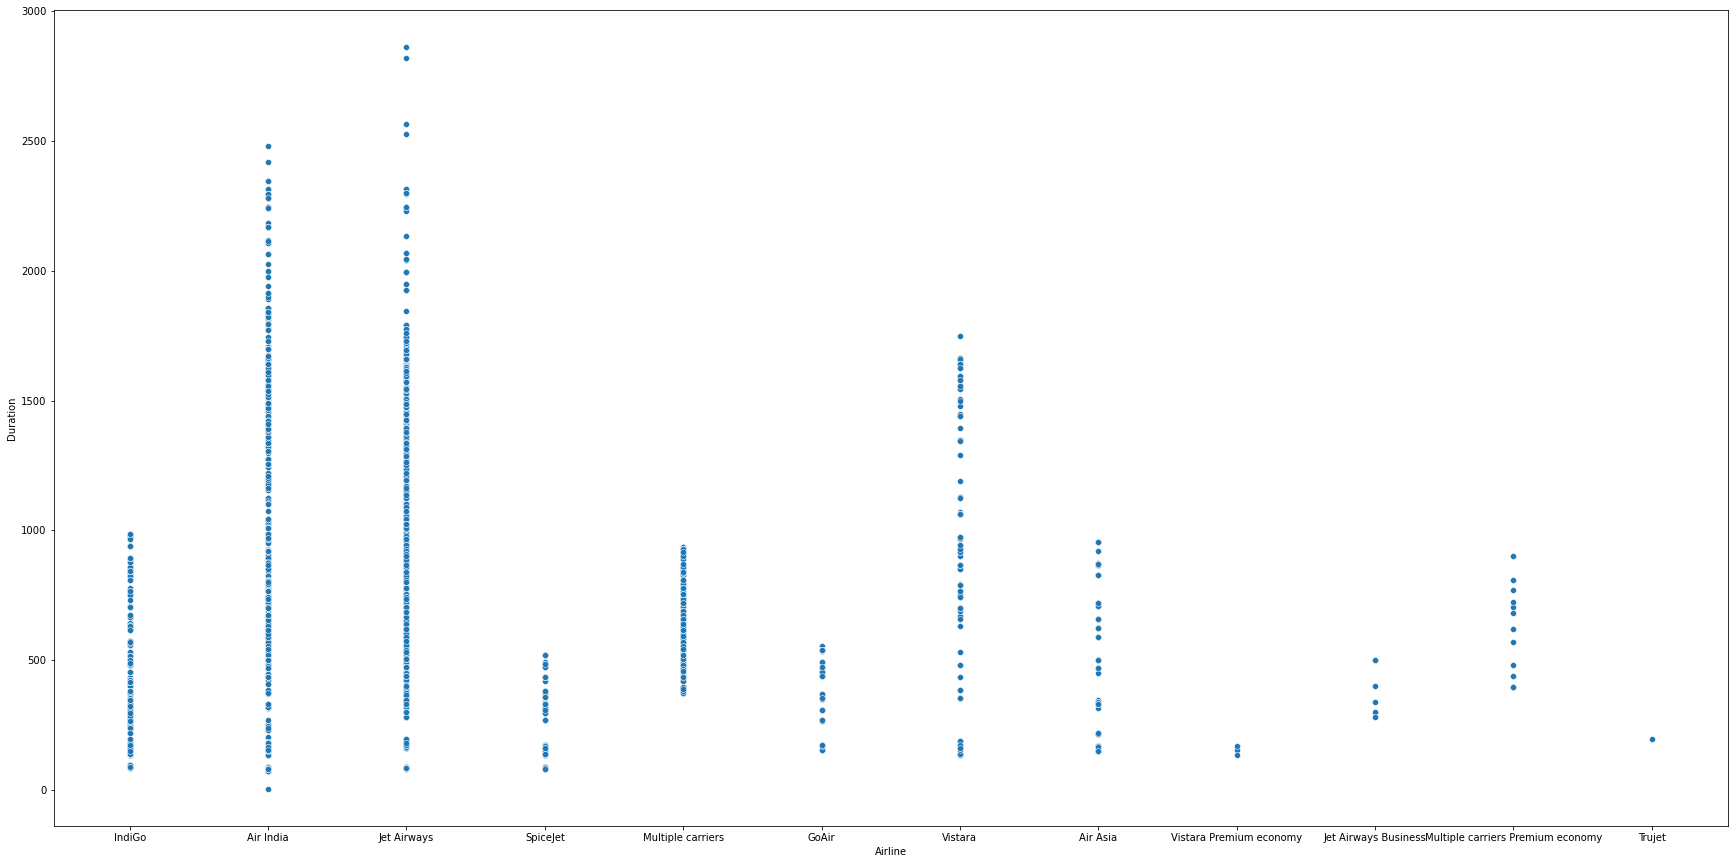

In [33]:
plt.figure(figsize = (30, 15))
sns.scatterplot(ds['Airline'], ds['Duration'])

from above we can see the Duration with respect to Airline from which Air India and Jet Airways has the highest flight on time

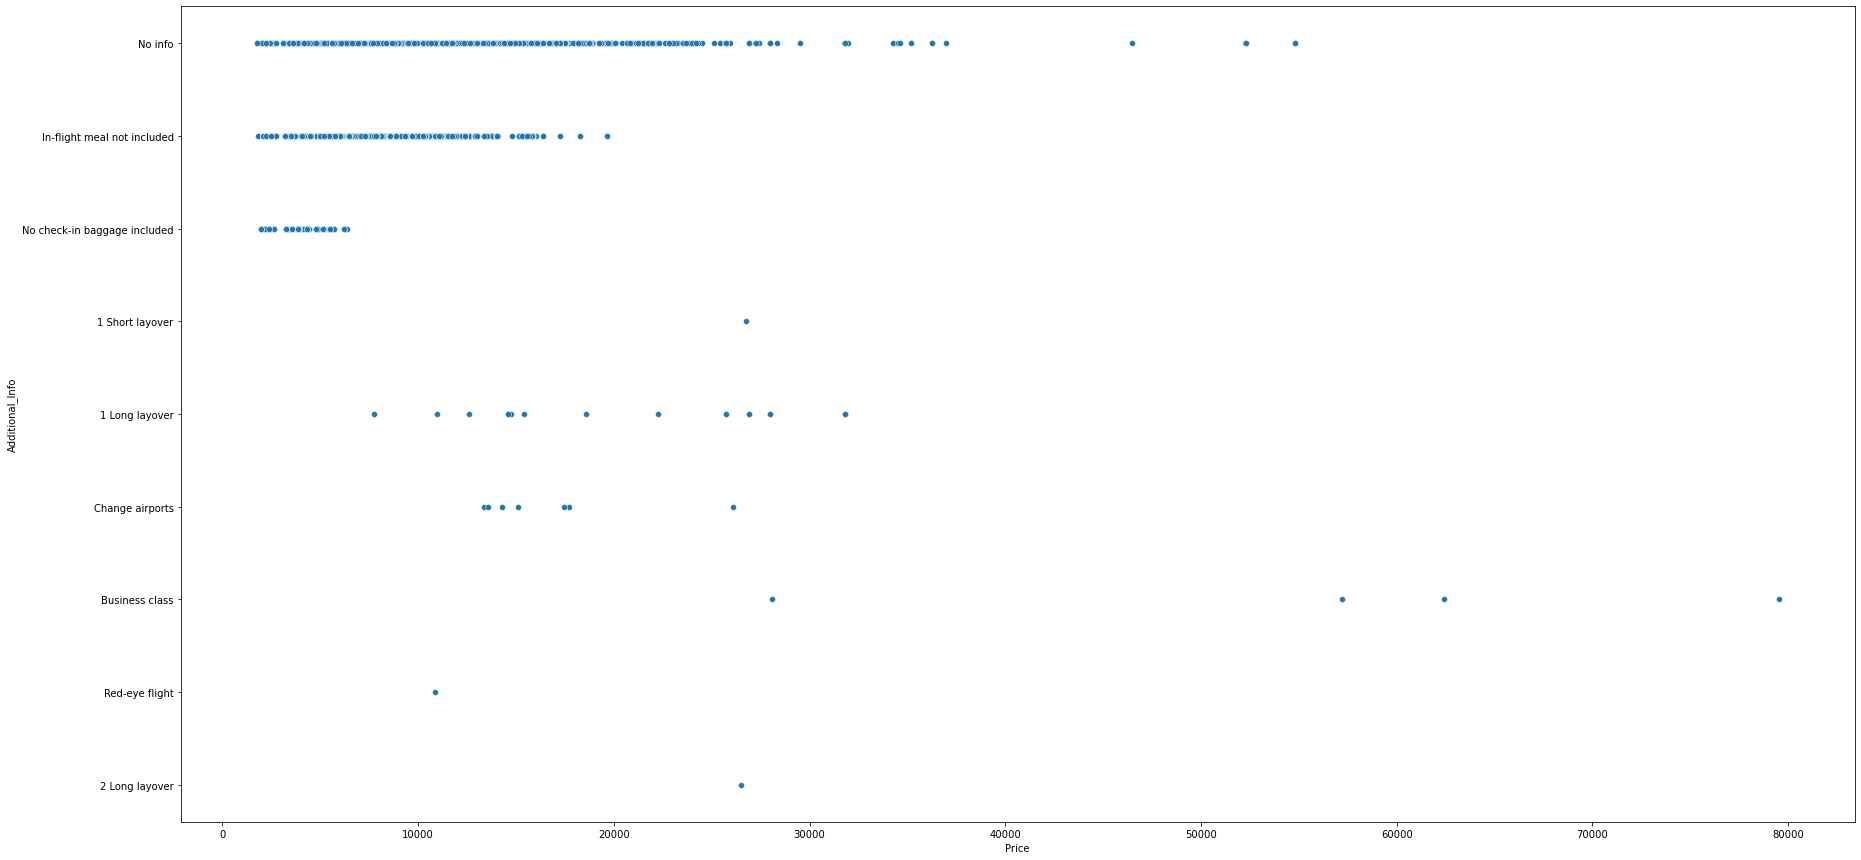

In [34]:
plt.figure(figsize = (30, 15))
sns.scatterplot(ds['Price'], ds['Additional_Info'])

we can see the price variance with respect to the Additional Info

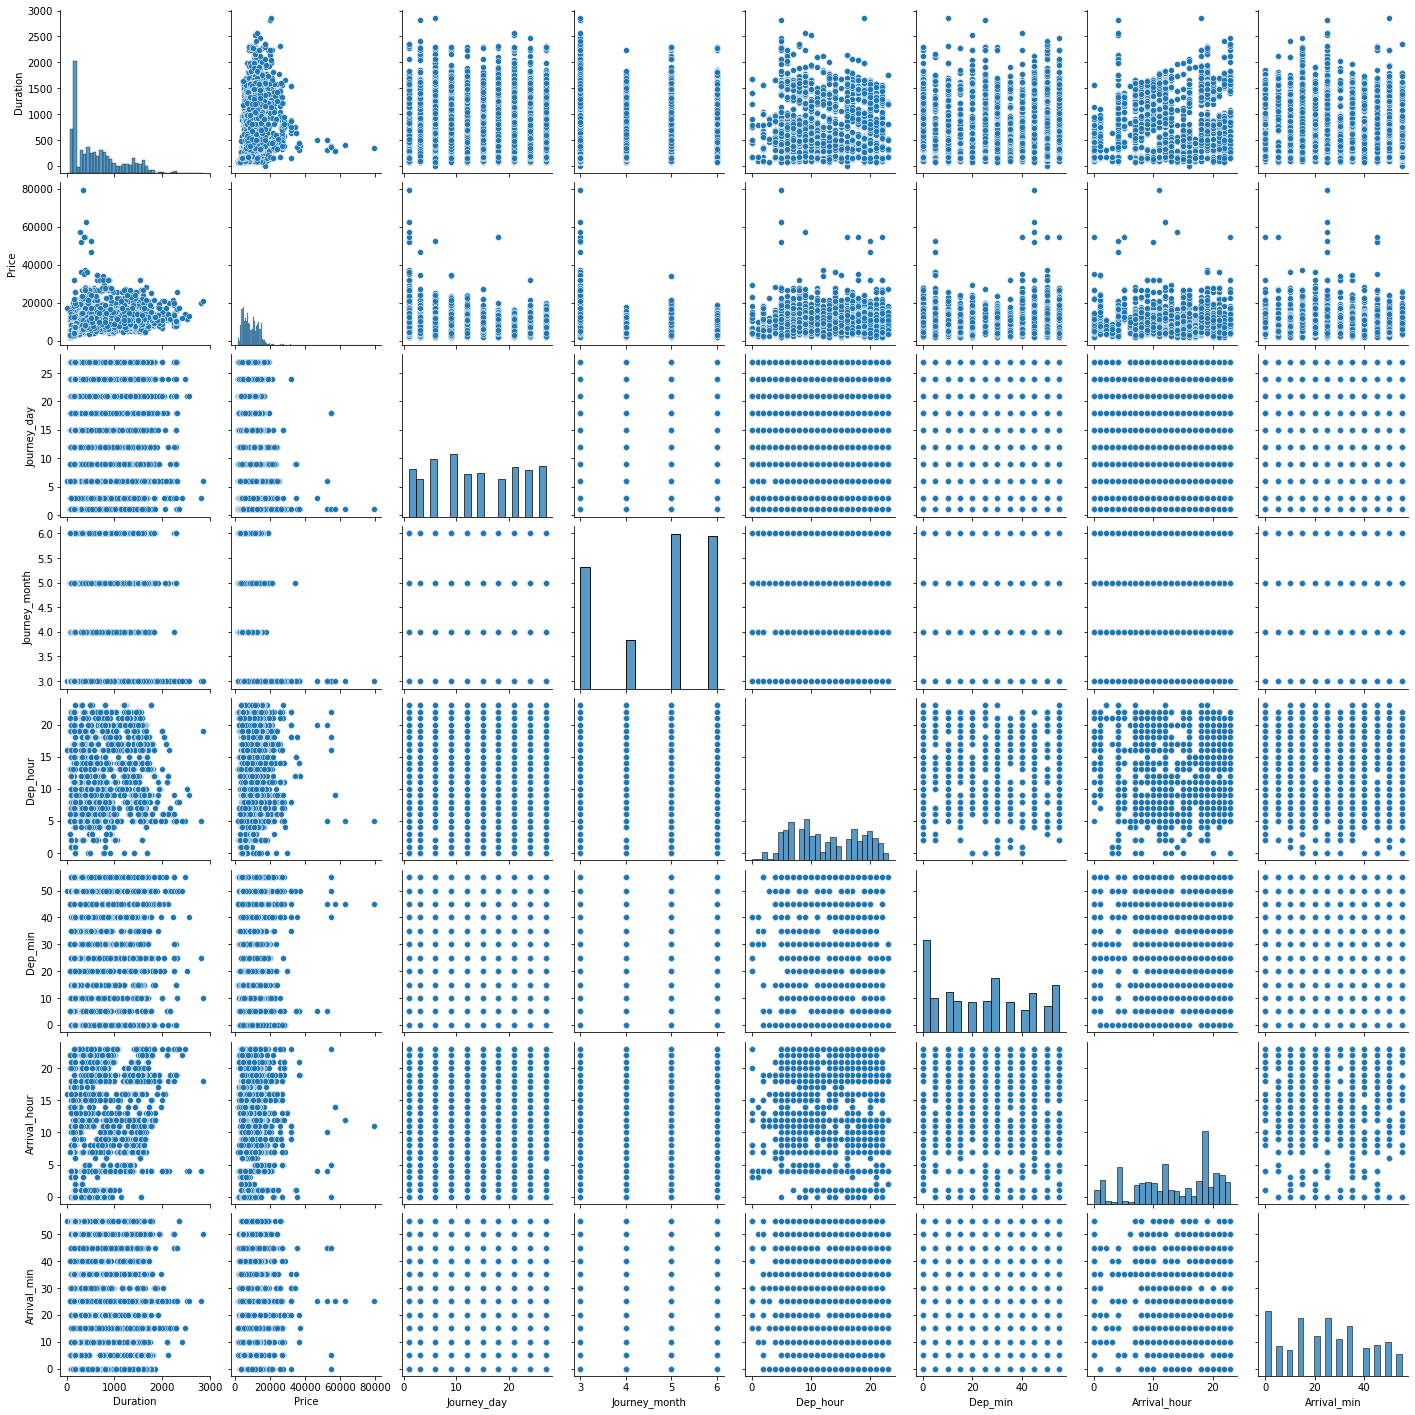

In [35]:
sns.pairplot(ds)

from above we can see all the plot for all the columns

lets see the information about the data again

In [36]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10682 non-null  int64 
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   Journey_day      10682 non-null  int64 
 9   Journey_month    10682 non-null  int64 
 10  Dep_hour         10682 non-null  int64 
 11  Dep_min          10682 non-null  int64 
 12  Arrival_hour     10682 non-null  int64 
 13  Arrival_min      10682 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 1.5+ MB


lets see if there are any outliers or skewness in the columns

from above we can see that there are still 6 object variable lets change them to numeric as well

In [37]:
categorical = ds.select_dtypes(exclude=['int64', 'float','int32'])
numerical = ds.select_dtypes(include=['int64', 'float','int32'])

In [38]:
categorical

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info
...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info


lets now encode the categorical variable to convert them into numeric 

In [39]:
le = LabelEncoder()

In [40]:
categorical = categorical.apply(le.fit_transform)

In [41]:
categorical

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,3,0,5,18,4,7
1,1,3,0,84,1,7
2,4,2,1,118,1,7
3,3,3,0,91,0,7
4,3,0,5,29,0,7
...,...,...,...,...,...,...
10678,0,3,0,64,4,7
10679,1,3,0,64,4,7
10680,4,0,2,18,4,7
10681,10,0,5,18,4,7


from above we can see that we have Successfully converted out categorical variable to Numeric one lets now concatinate numeric and categorical variable

In [42]:
ds = pd.concat([categorical, numerical], 1)

In [43]:
ds

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,4,7,170,3897,24,3,22,20,1,10
1,1,3,0,84,1,7,445,7662,1,5,5,50,13,15
2,4,2,1,118,1,7,1140,13882,9,6,9,25,4,25
3,3,3,0,91,0,7,325,6218,12,5,18,5,23,30
4,3,0,5,29,0,7,285,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,4,7,150,4107,9,4,19,55,22,25
10679,1,3,0,64,4,7,155,4145,27,4,20,45,23,20
10680,4,0,2,18,4,7,180,7229,27,4,8,20,11,20
10681,10,0,5,18,4,7,160,12648,1,3,11,30,14,10


from above we can see that we have successfully concatinated both our data into one datset 

lets now see the outliers and the skewness in the data using boxplot followed by ds.skew() and Distplot

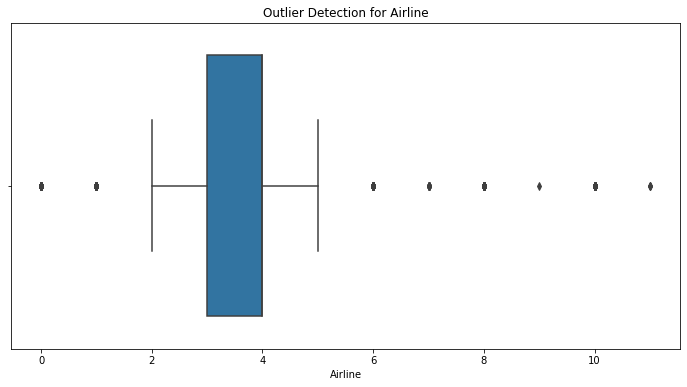

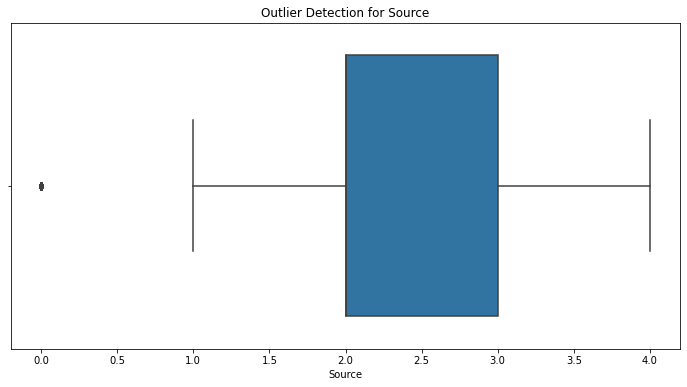

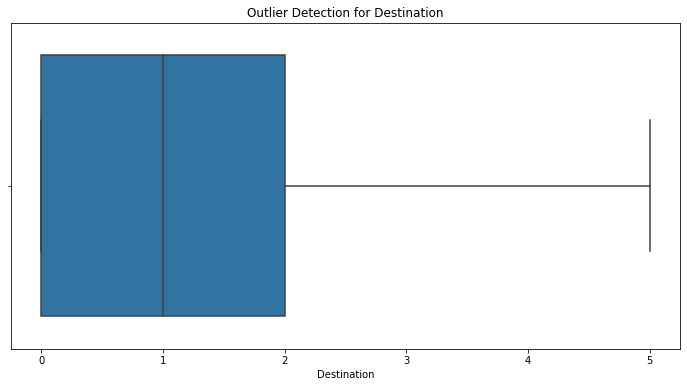

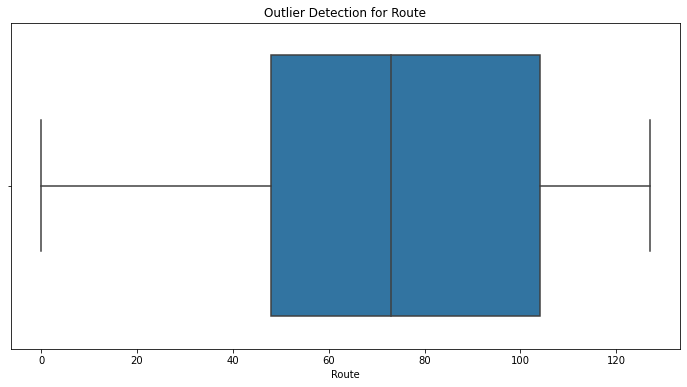

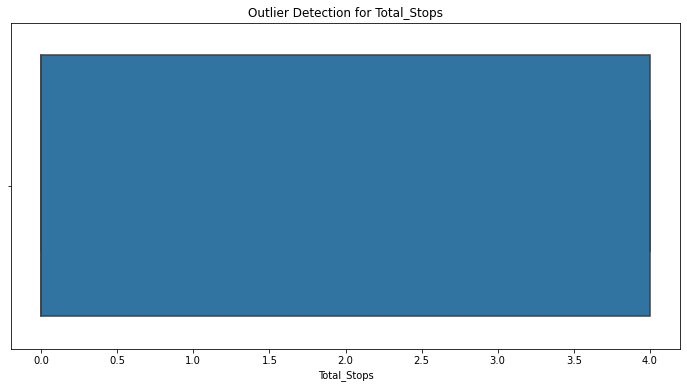

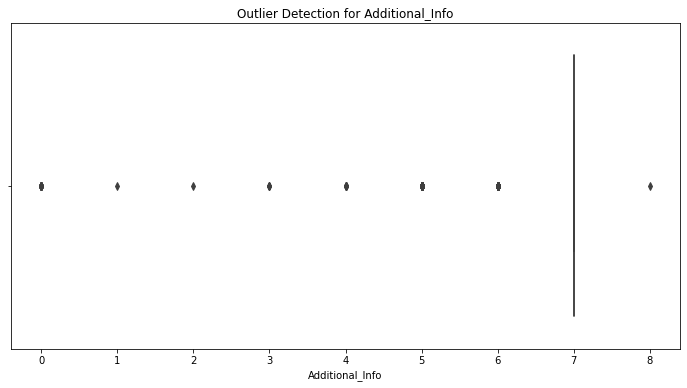

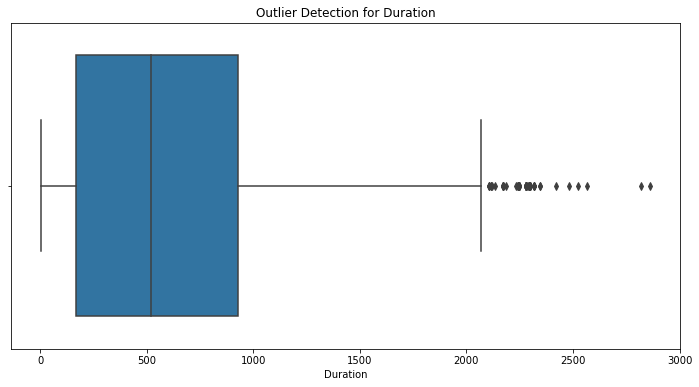

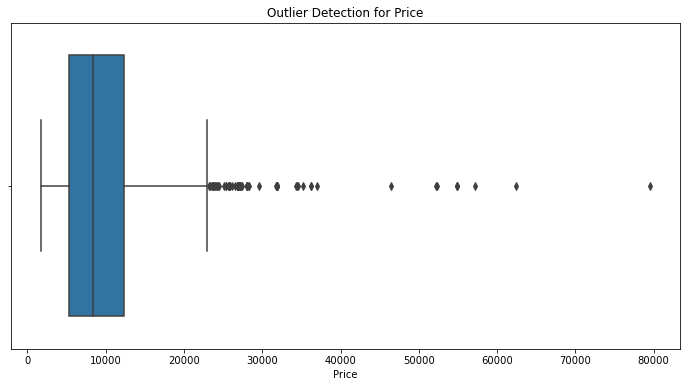

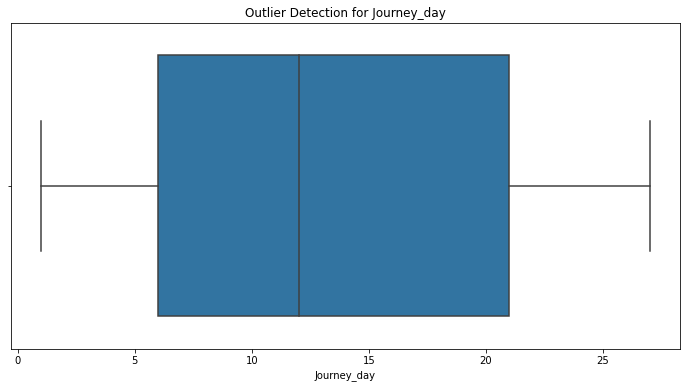

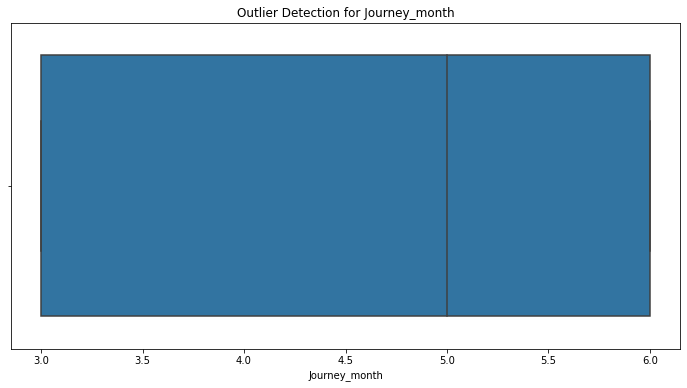

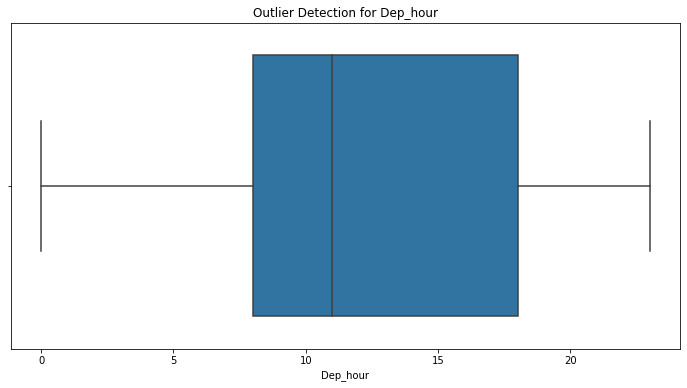

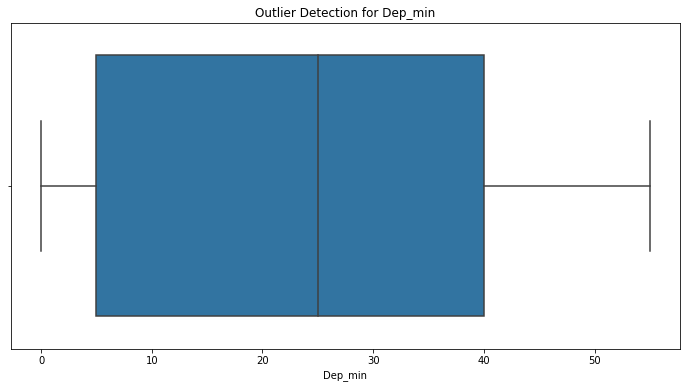

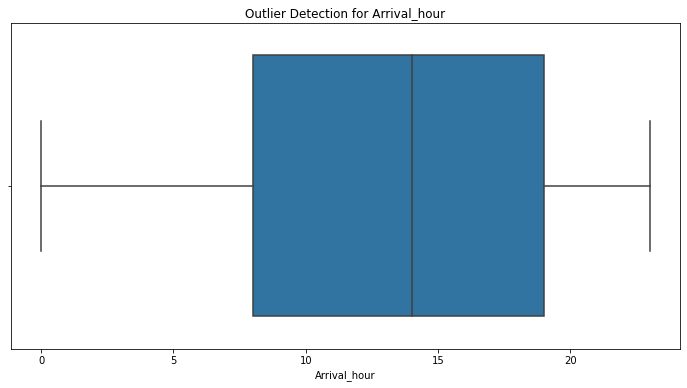

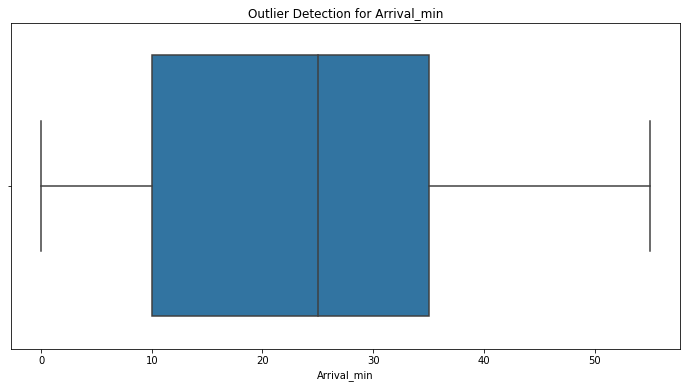

In [44]:
for i in ds.columns:
    plt.figure(figsize = (12,6))
    plt.title("Outlier Detection for {}".format(i))
    sns.boxplot(ds[i])

from above we can see that there are some outliers in the dataset but they are from the object columns so we will not remove the outliers from those column and the data which was int64 datatype i.e Price don't have any outliers

lets see the skewness of the data using ds.skew()

In [45]:
ds.skew()

Airline            0.731057
Source            -0.424023
Destination        1.244046
Route             -0.501911
Total_Stops        0.631532
Additional_Info   -2.114397
Duration           0.861411
Price              1.812405
Journey_day        0.118174
Journey_month     -0.387409
Dep_hour           0.112924
Dep_min            0.167234
Arrival_hour      -0.370146
Arrival_min        0.110945
dtype: float64

from above we can see that there are skewness in the data but they are also for the column which where object type or Target Variable so we will not remove the skewness from the data too.

So lets now seperate the dependent and independent variable

In [46]:
X = ds.drop('Price', 1)
Y = ds['Price']

In [47]:
X.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,4,7,170,24,3,22,20,1,10
1,1,3,0,84,1,7,445,1,5,5,50,13,15
2,4,2,1,118,1,7,1140,9,6,9,25,4,25
3,3,3,0,91,0,7,325,12,5,18,5,23,30
4,3,0,5,29,0,7,285,1,3,16,50,21,35


from above we can see that the dataset in not in the same scale

lets now scale the values for out independent varible

In [48]:
sc = StandardScaler()

In [49]:
X_new = sc.fit(X)
X_new = sc.fit_transform(X)
X_new = pd.DataFrame(X_new, columns = X.columns)

In [50]:
X_new

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,-0.410805,-1.658359,2.416534,-1.547082,1.407210,0.498649,-0.931498,1.237288,-1.467402,1.654154,-0.234950,-1.800436,-0.890014
1,-1.261152,0.890014,-0.973812,0.249946,-0.253703,0.498649,-0.389953,-1.475307,0.250289,-1.303113,1.363607,-0.050909,-0.587094
2,0.014369,0.040556,-0.295743,1.175687,-0.253703,0.498649,0.978679,-0.531796,1.109135,-0.607286,0.031476,-1.363054,0.018745
3,-0.410805,0.890014,-0.973812,0.440539,-0.807341,0.498649,-0.626263,-0.177979,0.250289,0.958326,-1.034229,1.407030,0.321664
4,-0.410805,-1.658359,2.416534,-1.247577,-0.807341,0.498649,-0.705034,-1.475307,-1.467402,0.610412,1.363607,1.115442,0.624584
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,-1.686326,0.890014,-0.973812,-0.294608,1.407210,0.498649,-0.970883,-0.531796,-0.608557,1.132283,1.630034,1.261236,0.018745
10678,-1.261152,0.890014,-0.973812,-0.294608,1.407210,0.498649,-0.961037,1.591104,-0.608557,1.306240,1.097181,1.407030,-0.284175
10679,0.014369,-1.658359,0.382326,-1.547082,1.407210,0.498649,-0.911805,1.591104,-0.608557,-0.781243,-0.234950,-0.342497,-0.284175
10680,2.565411,-1.658359,2.416534,-1.547082,1.407210,0.498649,-0.951190,-1.475307,-1.467402,-0.259372,0.297903,0.094885,-0.890014


from above we can see that all the columns are now in the same scale

lets now divide our dependent and independent variable into traning and testing data using train_test_split

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size = 0.22, random_state = 42)

now we are using random_state as 42 later we will find out the best random_state

now lets check the accuracy with random state as 42

In [52]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
lr.score(X_train, Y_train)

0.4142205128231269

In [53]:
predlr = lr.predict(X_test)
acclr = r2_score(Y_test, predlr)*100
print("Accuracy Score:", acclr)

Accuracy Score: 43.66032556626702


from above we can see that we got an Accuracy of 44% now let us find the best random state and then we will fit all the models using that random_state

In [54]:
models = [LinearRegression(), Lasso(), Ridge(), ElasticNet(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), SVR(), KNeighborsRegressor(), XGBRegressor(), XGBRFRegressor()]

In [55]:
maxacc = 0
maxrs = 0
model = 0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size = 0.22, random_state = i)
    for m in models:
        m.fit(X_train, Y_train)
        pred = m.predict(X_test)
        acc = r2_score(Y_test, pred)
        if acc > maxacc:
            maxacc = acc
            maxrs = i
            model = m
            
print("Maximum Accuracy is {} at Random State {} for Model {}".format(maxacc, maxrs, model))

Maximum Accuracy is 0.9389503054778069 at Random State 714 for Model XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


from above we can see that we got an accuracy score of 94% for XGBRegressor at Random State 714 lets now find out the accuracy of all the models at random stste 714 and choose the best from that

In [56]:
X = X_new

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 714)

In [58]:
print("Linear Regression")
lr = LinearRegression()
lr.fit(X_train, Y_train)
predlr = lr.predict(X_test)
acclr = r2_score(Y_test, predlr)*100
print("Accuracy Score:", acclr)
print("Mean Squared Error:", mean_squared_error(Y_test, predlr))
print("Mean Absolute Error:", mean_absolute_error(Y_test, predlr))
scorelr = cross_val_score(lr, X, Y, cv = 5)
scorelr = scorelr.mean()*100
print("Cross Validation Score", scorelr)

Linear Regression
Accuracy Score: 40.16831081056827
Mean Squared Error: 12764445.717028571
Mean Absolute Error: 2533.0526772855446
Cross Validation Score 41.69374930625148


In [59]:
print('Lasso Regression')
las = Lasso()
las.fit(X_train, Y_train)
predlas = las.predict(X_test)
acclas = r2_score(Y_test, predlas)*100
print("Accuarcy Score:", acclas)
print("Mean Squared Error:", mean_squared_error(Y_test, predlas))
print("Mean Abosute Error:", mean_absolute_error(Y_test, predlas))
scorelas= cross_val_score(las, X, Y, cv = 5)
scorelas = scorelas.mean()*100
print("Cross Validation Score",scorelas)

Lasso Regression
Accuarcy Score: 40.173440086158315
Mean Squared Error: 12763351.441390965
Mean Abosute Error: 2532.7491896619504
Cross Validation Score 41.6938583021005


In [60]:
print("Ridge Regression")
reg = Ridge()
reg.fit(X_train, Y_train)
predreg = reg.predict(X_test)
accreg = r2_score(Y_test, predreg)*100
print("Accuracy Score:", accreg)
print("Mean Squared Error:", mean_squared_error(Y_test, predreg))
print("Mean Absolute Error:", mean_absolute_error(Y_test, predreg))
scorereg = cross_val_score(reg, X, Y, cv = 5)
scorereg = scorereg.mean()*100
print("Cross Validation Score",scorereg)

Ridge Regression
Accuracy Score: 40.168631522499
Mean Squared Error: 12764377.296596423
Mean Absolute Error: 2533.0357553130843
Cross Validation Score 41.693790351816965


In [61]:
print("Elastic Net")
elas = ElasticNet()
elas.fit(X_train, Y_train)
predelas = elas.predict(X_test)
accelas = r2_score(Y_test, predelas)*100
print("Accuracy Score:", acclas)
print("Mean Squared Error:", mean_squared_error(Y_test, predelas))
print("Mean Abosulte Error:", mean_absolute_error(Y_test, predelas))
scoreelas = cross_val_score(elas, X, Y, cv = 5)
scoreelas = scoreelas.mean()*100
print("Cross Validation Score",scoreelas)

Elastic Net
Accuracy Score: 40.173440086158315
Mean Squared Error: 13296320.558212372
Mean Abosulte Error: 2625.083441009139
Cross Validation Score 38.377409903965045


In [62]:
print("Decision Tree")
dtr = DecisionTreeRegressor()
dtr.fit(X_train, Y_train)
predtr = dtr.predict(X_test)
accdtr = r2_score(Y_test, predtr)*100
print("Accuracy Score", accdtr)
print("Mean Squared Error:", mean_squared_error(Y_test, predtr))
print("Mean Absolute Error:", mean_absolute_error(Y_test, predtr))
scoredtr = cross_val_score(dtr, X, Y, cv = 5)
scoredtr = scoredtr.mean()*100
print("Cross Validation Score:", scoredtr)

Decision Tree
Accuracy Score 87.68303824666384
Mean Squared Error: 2627690.974951557
Mean Absolute Error: 693.0696157663406
Cross Validation Score: 78.96108518259817


In [63]:
print("Random Forest Regressor")
rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)
predrfr = rfr.predict(X_test)
accrfr = r2_score(Y_test, predrfr)*100
print("Accuracy Score", accrfr)
print("Mean Squared Error:", mean_squared_error(Y_test, predrfr))
print("Mean Absolute Error:", mean_absolute_error(Y_test, predrfr))
scorerfr = cross_val_score(rfr, X, Y, cv = 5)
scorerfr = scorerfr.mean()*100
print("Cross Validation Score:", scorerfr)

Random Forest Regressor
Accuracy Score 91.75948677184526
Mean Squared Error: 1758024.638886783
Mean Absolute Error: 624.5377271508916
Cross Validation Score: 88.32701656284581


In [64]:
print("AdaBoost Regressor")
adb = AdaBoostRegressor()
adb.fit(X_train, Y_train)
predadb = adb.predict(X_test)
accadb = r2_score(Y_test, predadb)*100
print("Accuracy Score:", accadb)
print("Mean Squared Error:", mean_squared_error(Y_test, predadb))
print("Mean Absolute Error:", mean_absolute_error(Y_test, predadb))
scoreadb = cross_val_score(adb, X, Y, cv = 5)
scoreadb = scoreadb.mean()*100
print("Cross Validation Score:", scoreadb)

AdaBoost Regressor
Accuracy Score: 50.11112170836787
Mean Squared Error: 10643254.226381835
Mean Absolute Error: 2700.6489812734726
Cross Validation Score: 37.10065393192765


In [65]:
print("SVR")
svr = SVR()
svr.fit(X_train, Y_train)
predsvr = svr.predict(X_test)
accsvr = r2_score(Y_test, predsvr)*100
print("Accuracy Score:", accsvr)
print("Mean Squared Error:", mean_squared_error(Y_test, predsvr))
print("Mean Absoulte Error:", mean_absolute_error(Y_test, predsvr))
scoresvr = cross_val_score(svr, X, Y, cv = 5)
scoresvr = scoresvr.mean()*100
print("Cross Validation Score:", scoresvr)

SVR
Accuracy Score: 3.3162675605341363
Mean Squared Error: 20626431.76487924
Mean Absoulte Error: 3433.1812680658873
Cross Validation Score: 3.2714558088789314


In [66]:
print("KNeighbours")
knn = KNeighborsRegressor()
knn.fit(X_train, Y_train)
predknn = knn.predict(X_test)
accknn = r2_score(Y_test, predknn)*100
print("Accuracy Score:", accknn)
print("Mean Squared Error:", mean_squared_error(Y_test, predknn))
print("Mean Absolute Error:", mean_absolute_error(Y_test, predknn))
scoreknn = cross_val_score(knn, X, Y, cv = 5)
scoreknn = scoreknn.mean()*100
print("Cross Validation score:", scoreknn)

KNeighbours
Accuracy Score: 77.74593924162254
Mean Squared Error: 4747663.894870268
Mean Absolute Error: 1193.471288813271
Cross Validation score: 77.07746172297315


In [67]:
print("XGBoost")
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)
predxgb = xgb.predict(X_test)
accxgb = r2_score(Y_test, predxgb)*100
print("Accuracy Score:", accxgb)
print("Mean Squared Error:", mean_squared_error(Y_test, predxgb))
print("Mean Absolute Error:", mean_absolute_error(Y_test, predxgb))
scorexgb = cross_val_score(xgb, X_new, Y, cv = 5)
scorexgb = scorexgb.mean()*100
print("Cross Validation Score:", scorexgb)

XGBoost
Accuracy Score: 93.89503054778069
Mean Squared Error: 1302429.4020890763
Mean Absolute Error: 680.6365913835701
Cross Validation Score: 89.07652740112475


In [68]:
print("XGBRF Regressor")
xgbrfr = XGBRFRegressor()
xgbrfr.fit(X_train, Y_train)
predxgbrfr = xgbrfr.predict(X_test)
accxgbrfr = r2_score(Y_test, predxgbrfr)*100
print("Accuracy Score:", accxgbrfr)
print("Mean Squared Error:", mean_squared_error(Y_test, predxgbrfr))
print("Mean Absolute Error:", mean_absolute_error(Y_test, predxgbrfr))
scorexgbrfr = cross_val_score(xgbrfr, X_new, Y, cv = 5)
scorexgbrfr = scorexgbrfr.mean()*100
print("Cross Validation Score:", scorexgbrfr)

XGBRF Regressor
Accuracy Score: 79.19876106759347
Mean Squared Error: 4437720.024233307
Mean Absolute Error: 1463.4405206561037
Cross Validation Score: 75.47341604825498


from above we can see all the accuracy score of all the models at random_state 714 now lets compare it

lets create a dataframe

In [69]:
Compare = {
    'Model Name':['Linear Regression', 'Lasso', 'Ridge', 'ElasticNet', 'Decision Tree', 'Random Forest', 'AdaBoost', 'SVR', 'KNeighbours', 'XGboost', 'XGBRF'],
    'Accuracy Score':[acclr, acclas, accreg, accelas, accdtr, accrfr, accadb, accsvr, accknn, accxgb, accxgbrfr],
    'Cross Validation Score':[scorelr, scorelas, scorereg, scoreelas, scoredtr, scorerfr, scoreadb, scoresvr, scoreknn, scorexgb, scorexgbrfr],
    'Accuracy Score - Cross Validation Score':[acclr-scorelr,acclas-scorelas,accreg-scorereg,accelas-scoreelas,accdtr-scoredtr,accrfr-scorerfr,accadb-scoreadb,accsvr-scoresvr,accknn-scoreknn,accxgb-scorexgb,accxgbrfr-scorexgbrfr]
}

In [70]:
compare = pd.DataFrame.from_dict(Compare)

In [71]:
compare

,Model Name,Accuracy Score,Cross Validation Score,Accuracy Score - Cross Validation Score
0,Linear Regression,40.168311,41.693749,-1.525438
1,Lasso,40.173440,41.693858,-1.520418
2,Ridge,40.168632,41.693790,-1.525159
3,ElasticNet,37.675216,38.377410,-0.702194
4,Decision Tree,87.683038,78.961085,8.721953
5,Random Forest,91.759487,88.327017,3.432470
6,AdaBoost,50.111122,37.100654,13.010468
7,SVR,3.316268,3.271456,0.044812
8,KNeighbours,77.745939,77.077462,0.668478
9,XGboost,93.895031,89.076527,4.818503


from here we compare all the model's Accuracy score and Cross Validation Score now lets do GridSearchCV for the models and see which models perform well and then we will find the best model

In [72]:
parameterlr = {
    'n_jobs':[1,2,3,4,5,6,7]
}

In [73]:
parameterreg = {
    'alpha':[1,2,3,4,5],
    'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

In [74]:
parameterlas = {
    'alpha':[1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10],
    'selection':['cyclic','random']
}

In [75]:
parameterelas = {
    'alpha':[1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10],
    'selection':['cyclic','random']
}

In [76]:
parameterdtr = {
    'criterion':['mse', 'friedman_mse', 'mae', 'poisson'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4]
}

In [77]:
parameteradb = {
    'n_estimators':[100,200,300],
    'loss':['linear','square','exponential']
}

In [78]:
parametersvr = {
    'kernel':['linear','poly','rbf'],
    'degree':[1,2,3],
    'gamma':['scale','auto'],
    'C':[1,2,3]
}

In [79]:
parameterknn = {
    'n_neighbors':[1,2,3,4],
    'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'n_jobs':[1,2,3,4]
}

In [80]:
parameterxgb = {
    'booster':['gbtree','gblinear','dart'],
    'gamma':[0,1,2,3,4],
    'max_depth':[1,2,3],
    'verbosity':[0],
    'silent':[0]
}

In [81]:
parameterxgbrfr = {
    'max_depth':[1,2,3,4],
    'gamma':[1,2,3,4],
    'alpha':[1,2,3,4],
    'verbosity':[0],
    'silent':[0]
}

In [82]:
parameterrfr = {
    'n_estimators':[100,200,300],
    'criterion':['mse', 'mae'],
    'max_depth':[1,2,3]
}

In [83]:
gscvlr = GridSearchCV(lr, parameterlr)
gscvlas = GridSearchCV(las, parameterlas)
gscvreg = GridSearchCV(reg, parameterreg)
gscvelas = GridSearchCV(elas, parameterelas)
gscvdtr = GridSearchCV(dtr, parameterdtr)
gscvadb = GridSearchCV(adb, parameteradb)
gscvsvr = GridSearchCV(svr, parametersvr)
gscvknn = GridSearchCV(knn, parameterknn)
gscvxgb = GridSearchCV(xgb, parameterxgb)
gscvxgbrfr = GridSearchCV(xgbrfr, parameterxgbrfr)
gscvrfr = GridSearchCV(rfr, parameterrfr)

In [84]:
gscvlr.fit(X_train, Y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'n_jobs': [1, 2, 3, 4, 5, 6, 7]})

In [85]:
gscvlas.fit(X_train, Y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10],
                         'selection': ['cyclic', 'random']})

In [86]:
gscvreg.fit(X_train, Y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']})

In [87]:
gscvelas.fit(X_train, Y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10],
                         'selection': ['cyclic', 'random']})

In [88]:
gscvdtr.fit(X_train, Y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': [1, 2, 3, 4],
                         'splitter': ['best', 'random']})

In [89]:
gscvadb.fit(X_train, Y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [100, 200, 300]})

In [90]:
gscvknn.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_jobs': [1, 2, 3, 4], 'n_neighbors': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']})

In [91]:
gscvxgb.fit(X_train, Y_train)

GridSearchCV(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=4,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
             param_grid={

In [92]:
gscvxgbrfr.fit(X_train, Y_train)

GridSearchCV(estimator=XGBRFRegressor(base_score=0.5, booster='gbtree',
                                      colsample_bylevel=1, colsample_bytree=1,
                                      gamma=0, gpu_id=-1,
                                      importance_type='gain',
                                      interaction_constraints='',
                                      max_delta_step=0, max_depth=6,
                                      min_child_weight=1, missing=nan,
                                      monotone_constraints='()',
                                      n_estimators=100, n_jobs=4,
                                      num_parallel_tree=100,
                                      objective='reg:squarederror',
                                      random_state=0, reg_alpha=0,
                                      scale_pos_weight=1, tree_method='exact',
                                      validate_parameters=1, verbosity=None),
             param_grid={'alpha': [1, 2

In [93]:
gscvsvr.fit(X_train, Y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 2, 3], 'degree': [1, 2, 3],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [94]:
gscvrfr.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [1, 2, 3],
                         'n_estimators': [100, 200, 300]})

In [95]:
gscv_predictlr = gscvlr.predict(X_test)
gscv_predictlas = gscvlas.predict(X_test)
gscv_predictreg = gscvreg.predict(X_test)
gscv_predictelas = gscvelas.predict(X_test)
gscv_predictdtr = gscvdtr.predict(X_test)
gscv_predictadb = gscvadb.predict(X_test)
gscv_predictsvr = gscvsvr.predict(X_test)
gscv_predictknn = gscvknn.predict(X_test)
gscv_predictxgb = gscvxgb.predict(X_test)
gscv_predictxgbrfr = gscvxgbrfr.predict(X_test)
gscv_predictrfr = gscvrfr.predict(X_test)

In [96]:
print("Accuracy Score of Linear Regresssion", r2_score(Y_test, gscv_predictlr))

Accuracy Score of Linear Regresssion 0.40168310810568275


In [97]:
print("Accuracy Score of Lasso Regression", r2_score(Y_test, gscv_predictlas))

Accuracy Score of Lasso Regression 0.40213551930551317


In [98]:
print("Accuracy Score of Ridge Regression", r2_score(Y_test, gscv_predictreg))

Accuracy Score of Ridge Regression 0.4016977284032701


In [99]:
print("Accuracy Score of ElasticNet", r2_score(Y_test, gscv_predictelas))

Accuracy Score of ElasticNet 0.4018080366339978


In [100]:
print("Accuracy Score of Decision Tree", r2_score(Y_test, gscv_predictdtr))

Accuracy Score of Decision Tree 0.6203774602382137


In [101]:
print("Accuracy Score of Random Forest Regression", r2_score(Y_test, gscv_predictrfr))

Accuracy Score of Random Forest Regression 0.5712835073243884


In [102]:
print("Accuracy Score of AdaBoost ", r2_score(Y_test, gscv_predictadb))

Accuracy Score of AdaBoost  0.40952233565808105


In [103]:
print("Accuracy Score of SVR", r2_score(Y_test, gscv_predictsvr))

Accuracy Score of SVR 0.36922078436158035


In [104]:
print("Accuracy Score of KNeighbours", r2_score(Y_test, gscv_predictknn))

Accuracy Score of KNeighbours 0.8195337558457474


In [105]:
print("Accuracy Score of XGBoost", r2_score(Y_test, gscv_predictxgb))

Accuracy Score of XGBoost 0.8848871865635557


In [106]:
print("Accuracy Score of XGBRFRegression", r2_score(Y_test, gscv_predictxgbrfr))

Accuracy Score of XGBRFRegression 0.6718440386451495


from above we can see that XGBoost has the heighest accuracy score so we will save XGBoost as our final model

using joblib.dump we will save it

In [107]:
joblib.dump(gscvxgb.best_estimator_, 'FlightPricePrediction.pkl')

['FlightPricePrediction.pkl']

lets now see the predicted value and True values and compare them

In [108]:
predicted = pd.DataFrame(gscv_predictxgb)

In [109]:
Compare = {
    'True_Values':Y_test,
    'Predicted Values':predicted
}

In [110]:
Y_test = pd.DataFrame(Y_test)

In [111]:
predicted

,0
0,11118.717773
1,6502.585449
2,9053.651367
3,4878.198730
4,9012.178711
...,...
2346,3779.128906
2347,13518.723633
2348,14516.541992
2349,12203.339844


In [112]:
Y_test

,Price
1963,12898
10154,7520
5743,9100
3888,4804
10166,7408
...,...
5897,3971
6313,14939
1202,13817
8704,12434


from above we can see the predicted and the Y_test values let us now import the test dataset and perform all the things that we have done on train data

In [113]:
dstest = pd.read_excel("~/Desktop/Datatrained/Flight Price Prediction/Test_set.xlsx")

In [114]:
dstest.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


lets now do the preprocessing of data that we have done with train data

In [115]:
dstest['Duration'] =  dstest['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [116]:
dstest["Journey_day"] = dstest['Date_of_Journey'].str.split('/').str[0].astype(int)

In [117]:
dstest["Journey_month"] = dstest['Date_of_Journey'].str.split('/').str[1].astype(int)

In [118]:
dstest.drop('Date_of_Journey',1,inplace = True)

In [119]:
dstest.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,655,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,240,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,1425,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,780,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,170,non-stop,No info,24,6


In [120]:
dstest["Dep_hour"] = pd.to_datetime(dstest["Dep_Time"]).dt.hour
dstest["Dep_min"] = pd.to_datetime(dstest["Dep_Time"]).dt.minute
dstest.drop(["Dep_Time"], axis = 1, inplace = True)

In [121]:
dstest["Arrival_hour"] = pd.to_datetime(dstest.Arrival_Time).dt.hour
dstest["Arrival_min"] = pd.to_datetime(dstest.Arrival_Time).dt.minute
dstest.drop(["Arrival_Time"], axis = 1, inplace = True)

In [122]:
dstest.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        0
Additional_Info    0
Journey_day        0
Journey_month      0
Dep_hour           0
Dep_min            0
Arrival_hour       0
Arrival_min        0
dtype: int64

from here we can see that there is no missing values in the test dataset

In [123]:
categorical = dstest.select_dtypes(exclude=['int64', 'float','int32'])
numerical = dstest.select_dtypes(include=['int64', 'float','int32'])

In [124]:
categorical = categorical.apply(le.fit_transform)

In [125]:
categorical

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,4,2,1,76,0,5
1,3,3,0,65,0,5
2,4,2,1,76,0,3
3,6,2,1,76,0,5
4,0,0,2,16,4,5
...,...,...,...,...,...,...
2666,1,3,0,51,0,5
2667,3,3,0,43,4,5
2668,4,2,1,76,0,5
2669,1,2,1,76,0,5


from above we can see that we have successfully convert it into numeric values

In [126]:
dstest = pd.concat([categorical, numerical], 1)

In [127]:
dstest

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,4,2,1,76,0,5,655,6,6,17,30,4,25
1,3,3,0,65,0,5,240,12,5,6,20,10,20
2,4,2,1,76,0,3,1425,21,5,19,15,19,0
3,6,2,1,76,0,5,780,21,5,8,0,21,0
4,0,0,2,16,4,5,170,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,51,0,5,1435,6,6,20,30,20,25
2667,3,3,0,43,4,5,155,27,3,14,20,16,55
2668,4,2,1,76,0,5,395,6,3,21,50,4,25
2669,1,2,1,76,0,5,915,6,3,4,0,19,15


In [128]:
dstest.skew()

Airline            0.483882
Source            -0.424997
Destination        1.263630
Route             -0.281807
Total_Stops        0.672623
Additional_Info   -1.719119
Duration           0.896103
Journey_day        0.199540
Journey_month     -0.403700
Dep_hour           0.093759
Dep_min            0.128515
Arrival_hour      -0.443166
Arrival_min        0.115267
dtype: float64

from above we can see that the skewness is equal to +/-0.5 and other which has higher skewness are object type data so we will not fix it

lets now scale the value using standardscalar

In [129]:
ds_test = sc.fit(dstest)
ds_test = sc.fit_transform(dstest)
ds_test = pd.DataFrame(ds_test, columns = dstest.columns)

In [130]:
ds_test

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,0.011908,0.032567,-0.294882,0.797952,-0.792411,0.480394,0.030389,-0.837333,1.094745,0.773265,0.267704,-1.361709,0.026340
1,-0.423779,0.877086,-0.976222,0.392406,-0.792411,0.480394,-0.796151,-0.110877,0.240505,-1.161445,-0.256324,-0.509324,-0.271771
2,0.011908,0.032567,-0.294882,0.797952,-0.792411,-2.148975,1.563970,0.978807,0.240505,1.125030,-0.518338,0.769252,-1.464213
3,0.883281,0.032567,-0.294882,0.797952,-0.792411,0.480394,0.279347,0.978807,0.240505,-0.809679,-1.304381,1.053380,-1.464213
4,-1.730840,-1.656471,0.386458,-1.414118,1.435515,0.480394,-0.935567,1.342035,1.094745,1.828561,1.577774,-1.645837,1.218783
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,-1.295153,0.877086,-0.976222,-0.123744,-0.792411,0.480394,1.583887,-0.837333,1.094745,1.300913,0.267704,0.911316,0.026340
2667,-0.423779,0.877086,-0.976222,-0.418687,1.435515,0.480394,-0.965442,1.705263,-1.467975,0.245617,-0.256324,0.343060,1.815004
2668,0.011908,0.032567,-0.294882,0.797952,-0.792411,0.480394,-0.487443,-0.837333,-1.467975,1.476795,1.315760,-1.361709,0.026340
2669,-1.295153,0.032567,-0.294882,0.797952,-0.792411,0.480394,0.548222,-0.837333,-1.467975,-1.513210,-1.304381,0.769252,-0.569881


from above we can see that we have converted all the columns into same scale

now lets us predict the flight price by using the above dataset

In [131]:
savedmodel = joblib.load('FlightPricePrediction.pkl')

In [132]:
predictednew = savedmodel.predict(ds_test)

In [133]:
predicted.to_excel("newsubmission.xlsx")

from above we can see that we have predicted the price of flight tickets from new dataset using our saved model

### We got and Accuracy of 86% from our model this way we can predict any flight ticket price using our saved model